In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
pd.set_option('display.max_columns', 50)
plt.rcParams['figure.figsize'] = (15, 7)

In [194]:
fear_greed_url = 'https://drive.google.com/uc?export=download&id=1PgQC0tO8XN-wqkNyghWc_-mnrYv_nhSf'
fear_greed_df = pd.read_csv(fear_greed_url)

fear_greed_df.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [195]:
trader_data_url = 'https://drive.google.com/uc?export=download&id=1IAfLZwu6rJzyWKgBToqwSmmVYU6VbjVs'
trader_df = pd.read_csv(trader_data_url)

trader_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [196]:
original_columns = trader_df.columns
trader_df.columns = [col.lower().replace(' ', '_') for col in original_columns]

print("Columns standardized.")
print(f"Example: '{original_columns[2]}' -> '{trader_df.columns[2]}'")

Columns standardized.
Example: 'Execution Price' -> 'execution_price'


In [197]:
print("--- Fear & Greed Info ---")
fear_greed_df.info()

print("\n" + "--- Trader Data Info ---")
trader_df.info()

--- Fear & Greed Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB

--- Trader Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   account           211224 non-null  object 
 1   coin              211224 non-null  object 
 2   execution_price   211224 non-null  float64
 3   size_tokens       211224 non-null  float64
 4   size_usd          211224 non-null  float64
 5   side              211224 non-null  object 
 6   timestamp_ist     211224 no

In [198]:
# Convert both date columns to datetime objects
fear_greed_df['date'] = pd.to_datetime(fear_greed_df['date'])
trader_df['timestamp_ist'] = pd.to_datetime(trader_df['timestamp_ist'], format='%d-%m-%Y %H:%M')

# Create the merge key in the trader dataframe
trader_df['trade_date'] = pd.to_datetime(trader_df['timestamp_ist'].dt.date)

# Check the result
trader_df[['timestamp_ist', 'trade_date']].head()

,timestamp_ist,trade_date
0,2024-12-02 22:50:00,2024-12-02
1,2024-12-02 22:50:00,2024-12-02
2,2024-12-02 22:50:00,2024-12-02
3,2024-12-02 22:50:00,2024-12-02
4,2024-12-02 22:50:00,2024-12-02


In [199]:
# Merge the dataframes
merged_df = pd.merge(
    trader_df,
    fear_greed_df[['date', 'value', 'classification']],
    how='left',
    left_on='trade_date',
    right_on='date'
)

# Clean up by dropping the redundant date column and any rows that didn't match
merged_df.drop(columns=['date'], inplace=True)
merged_df.dropna(subset=['value'], inplace=True)


# Display a sample of the merged data to verify
merged_df[['account', 'trade_date', 'closed_pnl', 'value', 'classification']].head()

,account,trade_date,closed_pnl,value,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,2024-12-02,0.0,80.0,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,2024-12-02,0.0,80.0,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,2024-12-02,0.0,80.0,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,2024-12-02,0.0,80.0,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,2024-12-02,0.0,80.0,Extreme Greed


In [200]:
# Filter for only the trades where a profit or loss was realized
pnl_events_df = merged_df[merged_df['closed_pnl'] != 0].copy()
pnl_events_df['win'] = (pnl_events_df['closed_pnl'] > 0).astype(int)

# Aggregate to the daily level per trader
daily_trader_performance = pnl_events_df.groupby(
    ['account', 'trade_date', 'classification', 'value']
).agg(
    total_pnl=('closed_pnl', 'sum'),
    total_fees=('fee', 'sum'),
    trade_count=('account', 'size'),
    win_count=('win', 'sum')
).reset_index()

# Calculate the final metrics
daily_trader_performance['net_pnl'] = daily_trader_performance['total_pnl'] - daily_trader_performance['total_fees']
daily_trader_performance['win_rate'] = (daily_trader_performance['win_count'] / daily_trader_performance['trade_count']) * 100

daily_trader_performance.head()

,account,trade_date,classification,value,total_pnl,total_fees,trade_count,win_count,net_pnl,win_rate
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-22,Extreme Greed,94.0,-21227.000000,33.823995,12,0,-21260.823995,0.000000
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-26,Extreme Greed,79.0,1603.100000,81.273495,12,12,1521.826505,100.000000
2,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-28,Extreme Greed,77.0,-132271.000000,131.679967,82,0,-132402.679967,0.000000
3,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-12-06,Greed,72.0,-175611.000056,121.229992,33,0,-175732.230048,0.000000
4,0x083384f897ee0f19899168e3b1bec365f52a9012,2025-01-19,Extreme Greed,77.0,71393.964098,383.421538,112,23,71010.542560,20.535714


In [201]:
sentiment_performance = daily_trader_performance.groupby('classification').agg(
    average_net_pnl=('net_pnl', 'mean'),
    median_net_pnl=('net_pnl', 'median'),
    average_win_rate=('win_rate', 'mean')
).reset_index()

# Order the categories logically for plotting
sentiment_order = ['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed']
sentiment_performance['classification'] = pd.Categorical(
    sentiment_performance['classification'],
    categories=sentiment_order,
    ordered=True
)

sentiment_performance.sort_values('classification')

,classification,average_net_pnl,median_net_pnl,average_win_rate
0,Extreme Fear,5723.464623,582.729223,77.153456
2,Fear,7438.553316,636.164874,86.248765
4,Neutral,4603.833285,541.631562,83.572108
3,Greed,4733.150861,768.477836,84.607371
1,Extreme Greed,6821.983455,1049.825036,86.788330


/var/folders/d7/01gc2krs2874kh1ghczynzbc0000gn/T/ipykernel_6210/704584704.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=sentiment_performance, x='classification', y='average_net_pnl', palette='viridis')


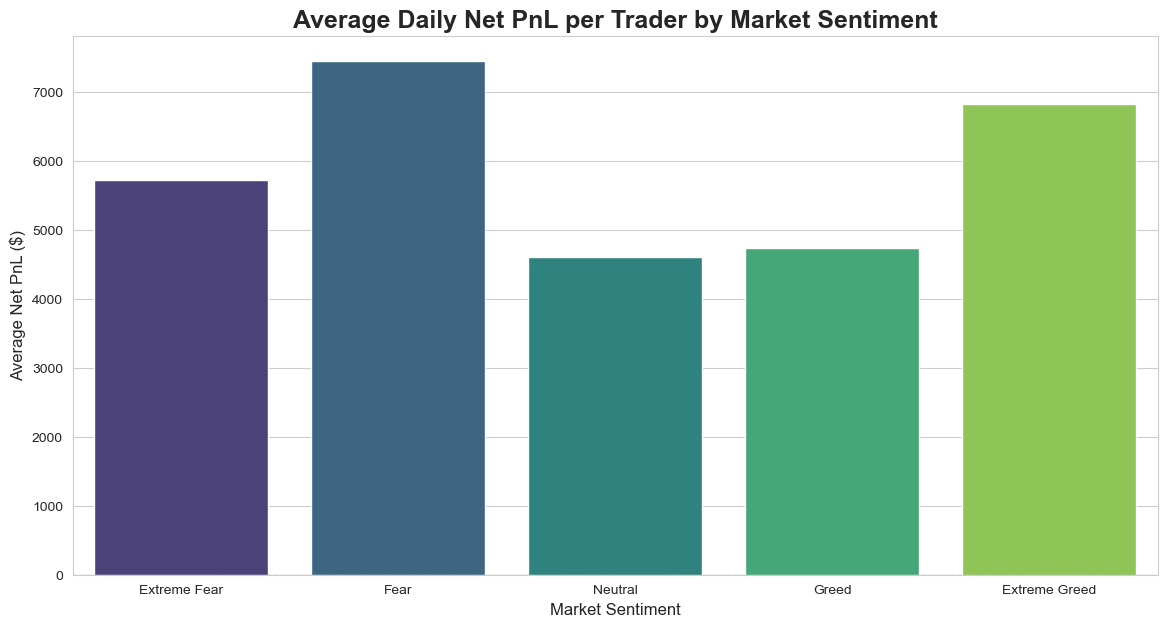

In [202]:
plt.figure(figsize=(14, 7))
ax = sns.barplot(data=sentiment_performance, x='classification', y='average_net_pnl', palette='viridis')
ax.set_title('Average Daily Net PnL per Trader by Market Sentiment', fontsize=18, fontweight='bold')
ax.set_xlabel('Market Sentiment', fontsize=12)
ax.set_ylabel('Average Net PnL ($)', fontsize=12)
ax.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.show()

/var/folders/d7/01gc2krs2874kh1ghczynzbc0000gn/T/ipykernel_6210/3929916668.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=sentiment_performance, x='classification', y='average_win_rate', palette='plasma')


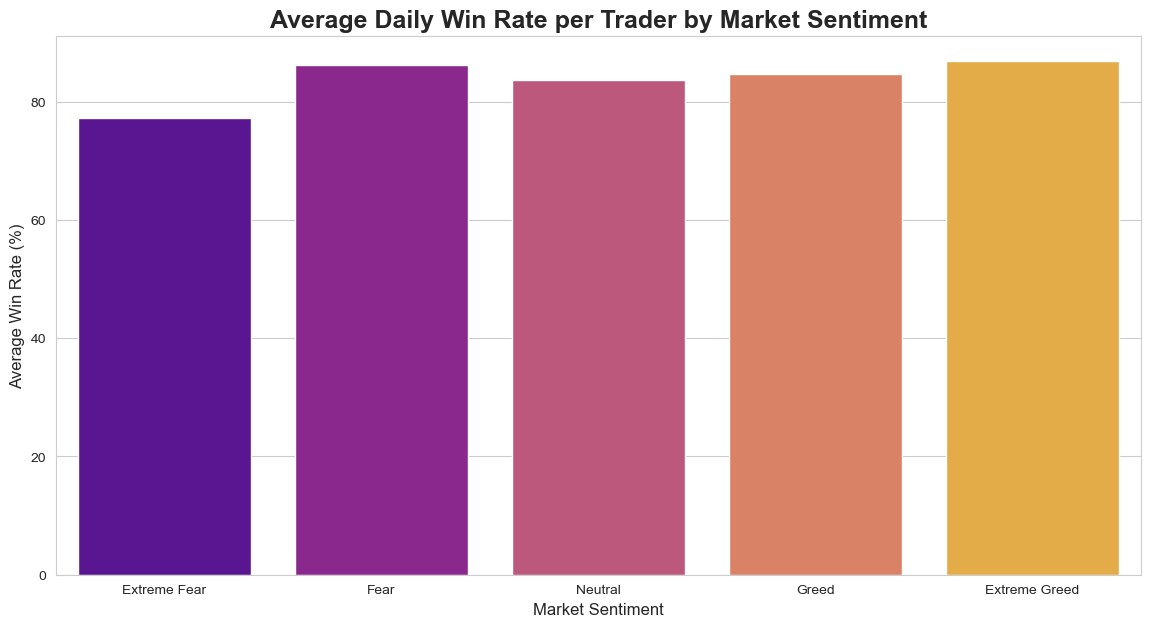

In [203]:
plt.figure(figsize=(14, 7))
ax = sns.barplot(data=sentiment_performance, x='classification', y='average_win_rate', palette='plasma')
ax.set_title('Average Daily Win Rate per Trader by Market Sentiment', fontsize=18, fontweight='bold')
ax.set_xlabel('Market Sentiment', fontsize=12)
ax.set_ylabel('Average Win Rate (%)', fontsize=12)
plt.show()

/var/folders/d7/01gc2krs2874kh1ghczynzbc0000gn/T/ipykernel_6210/3349834024.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=readable_pnl_df, x='classification', y='net_pnl', palette='coolwarm', order=sentiment_order)


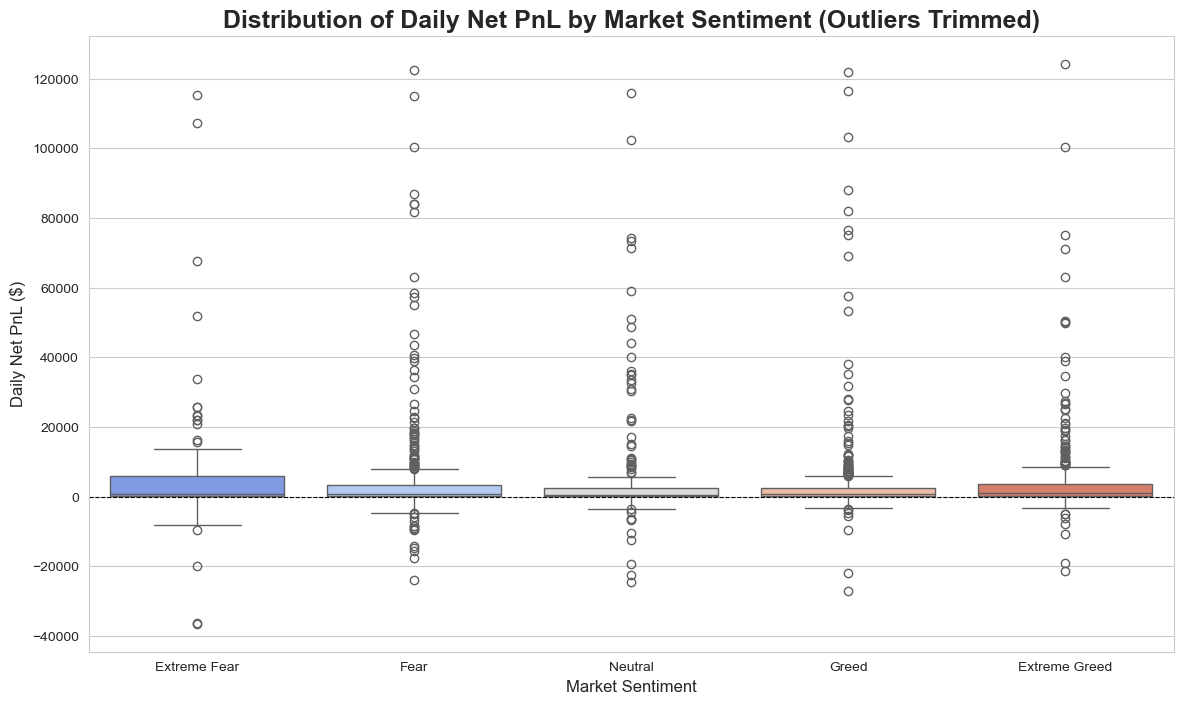

In [204]:
# Trim extreme outliers just for plot readability
pnl_quantile_99 = daily_trader_performance['net_pnl'].quantile(0.99)
pnl_quantile_01 = daily_trader_performance['net_pnl'].quantile(0.01)
readable_pnl_df = daily_trader_performance[
    (daily_trader_performance['net_pnl'] < pnl_quantile_99) &
    (daily_trader_performance['net_pnl'] > pnl_quantile_01)
]

plt.figure(figsize=(14, 8))
ax = sns.boxplot(data=readable_pnl_df, x='classification', y='net_pnl', palette='coolwarm', order=sentiment_order)
ax.set_title('Distribution of Daily Net PnL by Market Sentiment (Outliers Trimmed)', fontsize=18, fontweight='bold')
ax.set_xlabel('Market Sentiment', fontsize=12)
ax.set_ylabel('Daily Net PnL ($)', fontsize=12)
ax.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.show()

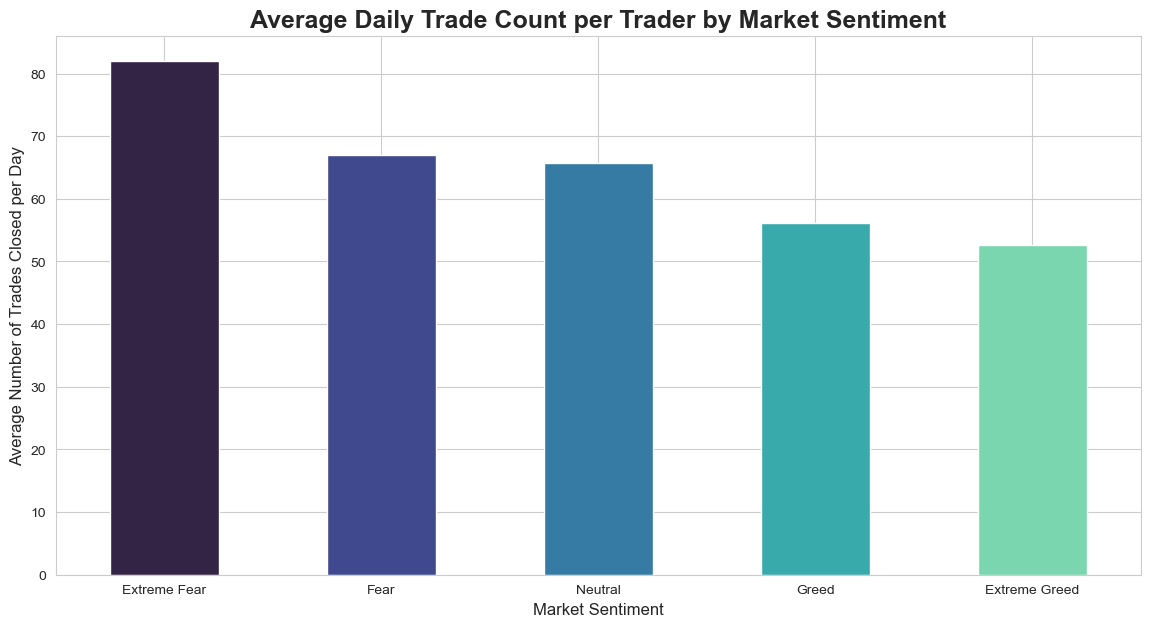

In [205]:
volume_analysis = daily_trader_performance.groupby('classification')['trade_count'].mean().reindex(sentiment_order)

plt.figure(figsize=(14, 7))
ax = volume_analysis.plot(kind='bar', color=sns.color_palette('mako', 5), rot=0)
ax.set_title('Average Daily Trade Count per Trader by Market Sentiment', fontsize=18, fontweight='bold')
ax.set_xlabel('Market Sentiment', fontsize=12)
ax.set_ylabel('Average Number of Trades Closed per Day', fontsize=12)
plt.show()

In [206]:
trader_summary = daily_trader_performance.groupby('account').agg(
    total_net_pnl=('net_pnl', 'sum'),
    average_win_rate=('win_rate', 'mean'),
    total_trades=('trade_count', 'sum')
).reset_index()

# Define performance tiers using quantiles
top_10_threshold = trader_summary['total_net_pnl'].quantile(0.9)
bottom_10_threshold = trader_summary['total_net_pnl'].quantile(0.1)

def assign_tier(pnl):
    if pnl >= top_10_threshold: return 'Top 10%'
    elif pnl <= bottom_10_threshold: return 'Bottom 10%'
    else: return 'Middle 80%'

trader_summary['performance_tier'] = trader_summary['total_net_pnl'].apply(assign_tier)

# Create the final comparison table
tier_comparison = trader_summary.groupby('performance_tier').agg(
    average_total_pnl=('total_net_pnl', 'mean'),
    average_win_rate=('average_win_rate', 'mean'),
    average_trade_count=('total_trades', 'mean')
).reindex(['Top 10%', 'Middle 80%', 'Bottom 10%'])

tier_comparison

,average_total_pnl,average_win_rate,average_trade_count
performance_tier,,,
Top 10%,1.373765e+06,83.145176,10139.750000
Middle 80%,2.042175e+05,85.370161,2361.833333
Bottom 10%,-6.665743e+04,75.816759,1789.750000


/var/folders/d7/01gc2krs2874kh1ghczynzbc0000gn/T/ipykernel_6210/755174588.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tier_comparison.reset_index(), x='performance_tier', y='average_win_rate', ax=axes[0], palette='crest')
/var/folders/d7/01gc2krs2874kh1ghczynzbc0000gn/T/ipykernel_6210/755174588.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tier_comparison.reset_index(), x='performance_tier', y='average_trade_count', ax=axes[1], palette='flare')


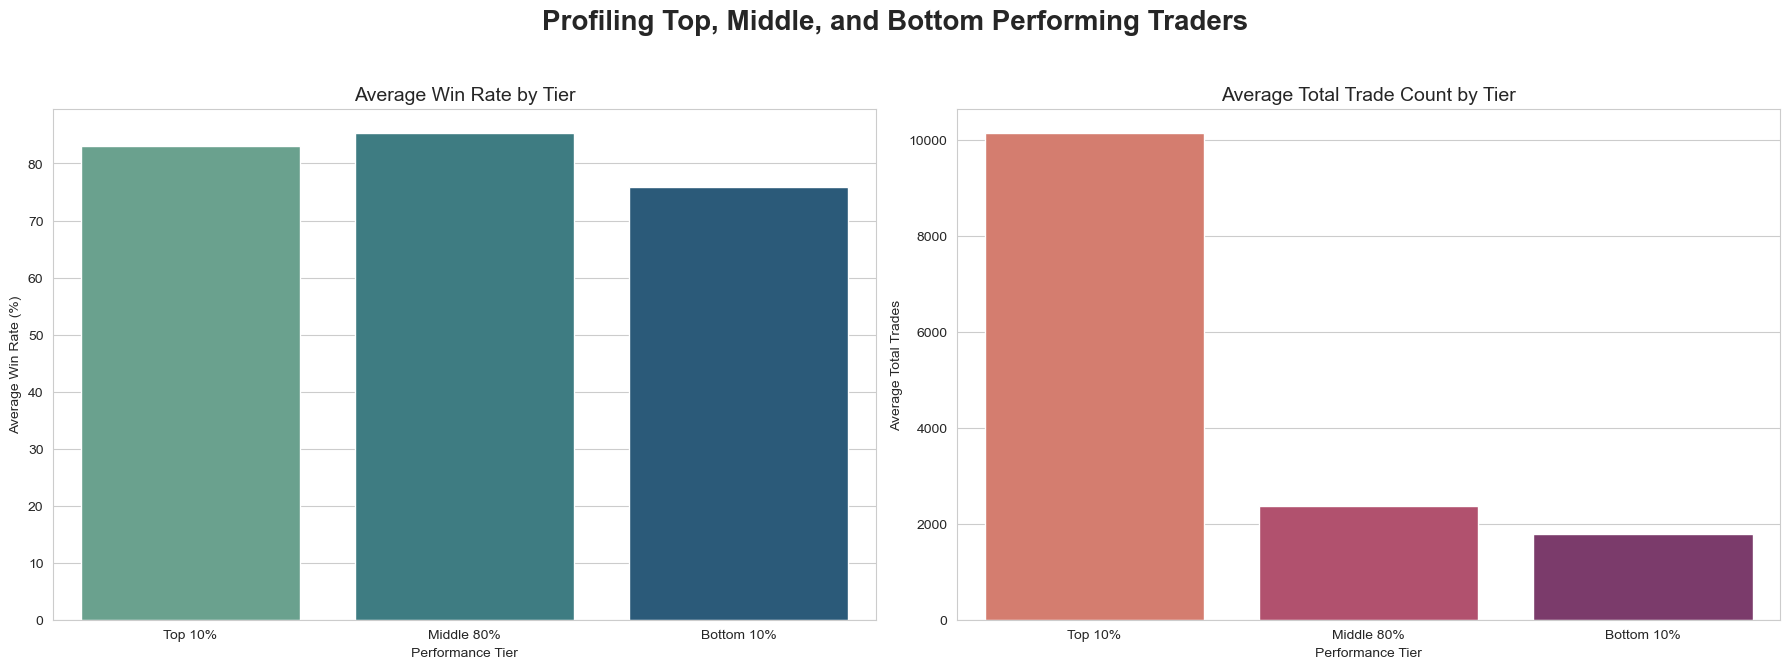

In [207]:
fig, axes = plt.subplots(1, 2, figsize=(18, 7))
fig.suptitle('Profiling Top, Middle, and Bottom Performing Traders', fontsize=20, fontweight='bold')

# Plot 1: Average Win Rate by Tier
sns.barplot(data=tier_comparison.reset_index(), x='performance_tier', y='average_win_rate', ax=axes[0], palette='crest')
axes[0].set_title('Average Win Rate by Tier', fontsize=14)
axes[0].set_xlabel('Performance Tier')
axes[0].set_ylabel('Average Win Rate (%)')

# Plot 2: Average Total Trades by Tier
sns.barplot(data=tier_comparison.reset_index(), x='performance_tier', y='average_trade_count', ax=axes[1], palette='flare')
axes[1].set_title('Average Total Trade Count by Tier', fontsize=14)
axes[1].set_xlabel('Performance Tier')
axes[1].set_ylabel('Average Total Trades')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [208]:
report = """
## Final Report: Trader Behavior & Market Sentiment Insights

### Key Finding 1: "Fear" Breeds Outlier Profits, "Greed" Breeds Consistency
- The highest **average** daily profits occur during "Fear," driven by a few massive wins.
- However, the **median** (typical) trader is more consistently profitable during "Greed" and "Extreme Greed."

### Key Finding 2: Traders Are Proactive in Fear, Cautious in Greed
- Trading activity is **highest** during "Extreme Fear" and systematically decreases as the market becomes more greedy.
- This suggests a pattern of "buying the dip" and reducing exposure as the market heats up.

### Key Finding 3: Top Traders Are Defined by Volume, Not Just Win Rate
- The most profitable 10% of traders are distinguished by their **enormous trading volume**, executing over 4x more trades than the average trader.
- Their win rate (83%) is high, but not the best. Their success stems from high activity combined with effective risk management that ensures wins are larger than losses over time.

### Actionable Strategies:
1.  **Embrace Volatility:** Develop specific strategies to capitalize on the opportunities present in fearful markets.
2.  **Focus on Risk Management:** Prioritize strategies with a strong profit/loss ratio over simply having the highest win rate.
3.  **Stay Active:** High, consistent market participation is strongly correlated with top-tier success in this dataset.
"""

print(report)


## Final Report: Trader Behavior & Market Sentiment Insights

### Key Finding 1: "Fear" Breeds Outlier Profits, "Greed" Breeds Consistency
- The highest **average** daily profits occur during "Fear," driven by a few massive wins.
- However, the **median** (typical) trader is more consistently profitable during "Greed" and "Extreme Greed."

### Key Finding 2: Traders Are Proactive in Fear, Cautious in Greed
- Trading activity is **highest** during "Extreme Fear" and systematically decreases as the market becomes more greedy.
- This suggests a pattern of "buying the dip" and reducing exposure as the market heats up.

### Key Finding 3: Top Traders Are Defined by Volume, Not Just Win Rate
- The most profitable 10% of traders are distinguished by their **enormous trading volume**, executing over 4x more trades than the average trader.
- Their win rate (83%) is high, but not the best. Their success stems from high activity combined with effective risk management that ensures wins are large